In [34]:
!pip install ndlib

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline
from scipy import stats

In [36]:
data = pd.read_csv("/content/tweets_cleaned.csv")
data.head(3)

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,Hate_Speech_Flag
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,"Respected indian citizens, namaskaar🙏i am the ...",0.0,0.0,clean
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*respected indian citizens,* namaskaar i am th...",0.0,0.0,clean
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-meet filmmaker prakash jha in new jersey t...,0.0,0.0,clean


In [37]:
data.shape

(46041, 7)

In [38]:
#Check if There Are Any Missing Values in the Entire Dataset
total_missing = data.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 4


In [39]:
#Display Only Columns with Missing Values
missing_columns = data.columns[data.isnull().any()]
print(f"Columns with missing values: {missing_columns.tolist()}")

Columns with missing values: ['Likes', 'Retweets']


In [40]:
# Identify rows with any missing values
rows_with_missing_values = data[data.isnull().any(axis=1)]

# Display the row numbers and the rows with missing values
for index, row in rows_with_missing_values.iterrows():
    print(f"Row {index}: {row.tolist()}")


Row 14078: ['15182', '2023-02-16 12:11:29+00:00', 'MadhuOmNamo', 'Adani exports power to bangladesh. adani is also developing the west container terminal in colombo port jointly with a sri lankan partner. both incidents show why adani is an indian developer. no indian company has resisted international criticism and politics like adani', nan, nan, 'clean']
Row 14079: ['. https://t.co/Rp8oEXya1y', '0', '0', 'Nan', nan, nan, 'clean']


In [41]:
# Drop rows with any missing values
data_cleaned = data.dropna()

# Optionally, you can do it in place (i.e., modify the original DataFrame)
# data.dropna(inplace=True)

In [42]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Display duplicate rows
print(data[duplicate_rows])

Empty DataFrame
Columns: [Unnamed: 0, Date, User, Tweet, Likes, Retweets, Hate_Speech_Flag]
Index: []


In [43]:
# Count duplicate rows
duplicate_count = data.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [44]:
data.isnull().any()

,0
Unnamed: 0,False
Date,False
User,False
Tweet,False
Likes,True
Retweets,True
Hate_Speech_Flag,False


In [45]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Check the updated shape of the DataFrame
print("Updated shape after removing rows:", data_cleaned.shape)


Updated shape after removing rows: (46039, 7)


In [46]:
# Helper function of seedset visualization
def visualize_seedsets(graph, blue_seed_set, red_seed_set, node_size=30):
    '''
    :param graph:
    :param blue_seed_set: the list of nodes
    :param red_seed_set: the list of nodes
    :param node_size: size of the nodes
    '''

    # Find the intersection of the lists
    inter_set = set(blue_seed_set).intersection(set(red_seed_set))

    print("Blue seed set: ", blue_seed_set)
    print("Red seed set: ", red_seed_set)
    print("Intersection set: ", inter_set)


    pos = nx.spring_layout(graph)
    plt.figure()
    nx.draw_networkx_edges(graph, pos, alpha=0.2)
    nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color='k', alpha=0.3)
    nx.draw_networkx_nodes(graph, pos, nodelist=red_seed_set, node_color='r', alpha=0.5,
                                node_size=node_size)
    nx.draw_networkx_nodes(graph, pos, nodelist=blue_seed_set, node_color='b', alpha=0.5,
                                node_size=node_size)
    nx.draw_networkx_nodes(graph, pos, nodelist=inter_set, node_color='g', alpha=1,
                                node_size=node_size)


    plt.axis('off')
    plt.show()

In [47]:
import networkx as nx  # Import the networkx library if you haven't already

# Create your graph object, for example:
G = nx.Graph()
# ... add nodes and edges to your graph ...

num_nodes = G.number_of_nodes()

print(f"Number of nodes in the graph: {num_nodes}")

Number of nodes in the graph: 0


In [48]:
# Run this twice
%matplotlib notebook
import time
import numpy as np
import pandas as pd
import networkx as nx
from scipy.linalg import eigh
from bokeh.io import output_notebook, show
#from helper import *
#import community
import matplotlib.pyplot as plt

%matplotlib inline
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as si
from ndlib.models.epidemics import ThresholdModel
from ndlib.models.epidemics import IndependentCascadesModel
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

In [49]:
# Convert all columns to strings to apply the regex
#filtered_data = data[~data.astype(str).apply(lambda x: x.str.contains(link_pattern, regex=True, na=False)).any(axis=1)]


In [50]:
# Apply the regex only to string columns
#filtered_data = data[~data.select_dtypes(include=['object']).apply(lambda x: x.str.contains(link_pattern, regex=True, na=False)).any(axis=1)]


In [60]:
data = pd.read_csv('/content/sample_data/musae_ES_edges.csv')
#data1 = np.genfromtxt(fname='Network for IC LT.txt')
#pd.read_txt('sample_data/Data/')
#data2=pd.read_txt('sample_data/Data/Network for IC-u LT-u.txt')
# Read the edgelist of the NetScience network
G = nx.from_pandas_edgelist(data, data.columns[0], data.columns[1])
print("Edges", G.number_of_edges())
print("Nodes", G.number_of_nodes())
print("len", len(max(nx.connected_components(G), key=len)))
G.nodes(data=True)

#To attribute features to nodes
target = pd.read_csv('/content/sample_data/musae_ES_target.csv')
#target = target.drop(columns = ['User'])
target = target.set_index('id')
nx.set_node_attributes(G, target.to_dict('index'))
G.nodes(data=True)

Edges 59382
Nodes 4648
len 4648


NodeDataView({0: {}, 1819: {}, 2840: {}, 1: {}, 1565: {}, 1309: {}, 1397: {}, 2677: {}, 3497: {}, 357: {}, 1492: {}, 4125: {}, 1351: {}, 2: {}, 1437: {}, 1728: {}, 214: {}, 485: {}, 2753: {}, 676: {}, 3719: {}, 3: {}, 3830: {}, 2504: {}, 3387: {}, 4528: {}, 246: {}, 1266: {}, 982: {}, 596: {}, 291: {}, 2480: {}, 1676: {}, 1450: {}, 79: {}, 2112: {}, 222: {}, 2558: {}, 574: {}, 1376: {}, 2306: {}, 4642: {}, 1988: {}, 2922: {}, 896: {}, 4: {}, 2213: {}, 7: {}, 1169: {}, 963: {}, 2647: {}, 2182: {}, 1011: {}, 1264: {}, 3984: {}, 483: {}, 4397: {}, 1480: {}, 3767: {}, 1447: {}, 2771: {}, 3737: {}, 1451: {}, 1827: {}, 4423: {}, 1121: {}, 2414: {}, 4217: {}, 1067: {}, 3675: {}, 1513: {}, 4121: {}, 1083: {}, 2853: {}, 793: {}, 549: {}, 3159: {}, 5: {}, 3655: {}, 3022: {}, 570: {}, 2348: {}, 2273: {}, 4001: {}, 4228: {}, 3762: {}, 2483: {}, 111: {}, 3915: {}, 140: {}, 3128: {}, 1832: {}, 4569: {}, 1604: {}, 531: {}, 6: {}, 1047: {}, 2280: {}, 8: {}, 3235: {}, 4162: {}, 2864: {}, 4245: {}, 2891

In [61]:
print(target.columns)


Index(['days', 'mature', 'views', 'partner', 'new_id'], dtype='object')


In [62]:
G = G.subgraph(max(nx.connected_components(G), key=len))
print("Edges", G.number_of_edges())
print("Nodes", G.number_of_nodes())

Edges 59382
Nodes 4648


prune graph:

Betweenness Centrality: This is a measure of a node's importance in a graph, based on the number of shortest paths that pass through it. Nodes with high betweenness centrality are critical connectors within the network, playing a significant role in maintaining the flow of information between other nodes.

betweenness centrality <= 0.0001

In [63]:
# TO CREATE A CONNECTED GRAPH
#it is slow and takes a few minutes to run
between = nx.betweenness_centrality(G)
new_nodes = {k:float(v) for (k,v) in between.items() if float(v) >= 0.00015 }

subgraph = G.subgraph(new_nodes.keys())
print("Edges", subgraph.number_of_edges())
print("Nodes", subgraph.number_of_nodes())
G_connected = subgraph
G_connected.nodes(data=True)

# densely connected graph SIR value -
# {0: 13, 1: 6, 2: 1403}

Edges 28677
Nodes 1325


NodeDataView({1: {}, 4: {}, 12: {}, 20: {}, 25: {}, 30: {}, 31: {}, 33: {}, 35: {}, 39: {}, 44: {}, 45: {}, 46: {}, 56: {}, 60: {}, 61: {}, 68: {}, 69: {}, 71: {}, 72: {}, 79: {}, 81: {}, 85: {}, 86: {}, 87: {}, 89: {}, 90: {}, 92: {}, 93: {}, 96: {}, 98: {}, 101: {}, 103: {}, 105: {}, 107: {}, 109: {}, 110: {}, 111: {}, 123: {}, 124: {}, 125: {}, 126: {}, 129: {}, 137: {}, 140: {}, 146: {}, 148: {}, 150: {}, 152: {}, 158: {}, 159: {}, 162: {}, 165: {}, 166: {}, 171: {}, 172: {}, 182: {}, 183: {}, 189: {}, 191: {}, 193: {}, 194: {}, 196: {}, 198: {}, 201: {}, 202: {}, 203: {}, 207: {}, 213: {}, 214: {}, 217: {}, 222: {}, 223: {}, 238: {}, 240: {}, 245: {}, 246: {}, 247: {}, 248: {}, 253: {}, 264: {}, 275: {}, 278: {}, 284: {}, 288: {}, 291: {}, 293: {}, 294: {}, 305: {}, 307: {}, 309: {}, 310: {}, 316: {}, 322: {}, 323: {}, 324: {}, 325: {}, 326: {}, 330: {}, 331: {}, 332: {}, 341: {}, 345: {}, 347: {}, 349: {}, 351: {}, 352: {}, 354: {}, 355: {}, 361: {}, 362: {}, 363: {}, 364: {}, 36

In [64]:
# TO CREATE A CONNECTED GRAPH
#it is slow and takes a few minutes to run
between = nx.betweenness_centrality(G)
new_nodes = {k:float(v) for (k,v) in between.items() if float(v) >= 0.000005 }

subgraph = G.subgraph(new_nodes.keys())
print("Edges", subgraph.number_of_edges())
print("Nodes", subgraph.number_of_nodes())
G_connected = subgraph
G_connected.nodes(data=True)

Edges 55129
Nodes 3429


NodeDataView({1819: {}, 2840: {}, 1: {}, 1565: {}, 1309: {}, 1397: {}, 2677: {}, 357: {}, 4125: {}, 1351: {}, 2: {}, 1437: {}, 1728: {}, 214: {}, 485: {}, 2753: {}, 3719: {}, 3: {}, 3830: {}, 2504: {}, 3387: {}, 4528: {}, 246: {}, 1266: {}, 982: {}, 596: {}, 291: {}, 2480: {}, 1676: {}, 1450: {}, 79: {}, 2112: {}, 222: {}, 2558: {}, 574: {}, 1376: {}, 2306: {}, 4642: {}, 1988: {}, 2922: {}, 896: {}, 4: {}, 2213: {}, 7: {}, 1169: {}, 963: {}, 2647: {}, 2182: {}, 1011: {}, 1264: {}, 3984: {}, 483: {}, 4397: {}, 1480: {}, 3767: {}, 2771: {}, 3737: {}, 1451: {}, 1827: {}, 4423: {}, 1121: {}, 2414: {}, 4217: {}, 1067: {}, 1513: {}, 4121: {}, 1083: {}, 2853: {}, 793: {}, 549: {}, 3159: {}, 5: {}, 3655: {}, 3022: {}, 570: {}, 2348: {}, 2273: {}, 4001: {}, 4228: {}, 3762: {}, 2483: {}, 111: {}, 3915: {}, 140: {}, 3128: {}, 1832: {}, 4569: {}, 1604: {}, 531: {}, 6: {}, 1047: {}, 2280: {}, 8: {}, 3235: {}, 4162: {}, 2864: {}, 4245: {}, 2891: {}, 755: {}, 10: {}, 2574: {}, 1857: {}, 781: {}, 1873

 for above output: The subgraph consists of only one node. This suggests that when filtering nodes with betweenness centrality >= 0.00015, only one node met the criteria.
This indicates that your filter threshold (0.00015) might be too high for this graph, resulting in the exclusion of almost all nodes.

In [65]:
# TO CREATE A DISCONNECTED GRAPH
#to make a disconnected graph
between_disconnected = between
disconnected_nodes = {k:float(v) for (k,v) in between_disconnected.items() if float(v) <= 0.0001 }

disconnected_graph = G.subgraph(disconnected_nodes.keys())
print("Edges", disconnected_graph.number_of_edges())
print("Nodes", disconnected_graph.number_of_nodes())
G_disconnected = disconnected_graph
G_disconnected.nodes(data=True)
# disconnected_nodes

#The SIR outcome of this disconnected graph is so bad
# {0: 2279, 1: 6, 2: 439}

Edges 2172
Nodes 3014


NodeDataView({0: {}, 3497: {}, 357: {}, 1492: {}, 4125: {}, 2: {}, 1437: {}, 676: {}, 3: {}, 7: {}, 2182: {}, 1011: {}, 1480: {}, 1447: {}, 2771: {}, 1451: {}, 4423: {}, 2414: {}, 1067: {}, 3675: {}, 3159: {}, 5: {}, 3022: {}, 2348: {}, 2273: {}, 4228: {}, 3762: {}, 3915: {}, 6: {}, 2280: {}, 8: {}, 4162: {}, 4245: {}, 755: {}, 10: {}, 11: {}, 617: {}, 627: {}, 340: {}, 916: {}, 1727: {}, 4491: {}, 2563: {}, 1504: {}, 2109: {}, 3827: {}, 1234: {}, 133: {}, 3259: {}, 2136: {}, 2850: {}, 434: {}, 1014: {}, 55: {}, 768: {}, 770: {}, 1050: {}, 635: {}, 3484: {}, 1623: {}, 4298: {}, 2937: {}, 2221: {}, 215: {}, 1085: {}, 541: {}, 2839: {}, 1544: {}, 905: {}, 13: {}, 91: {}, 3055: {}, 4267: {}, 2321: {}, 163: {}, 3635: {}, 14: {}, 2234: {}, 1005: {}, 2140: {}, 4647: {}, 743: {}, 2268: {}, 2612: {}, 2816: {}, 15: {}, 16: {}, 17: {}, 3498: {}, 4027: {}, 3556: {}, 4600: {}, 18: {}, 1093: {}, 19: {}, 1667: {}, 667: {}, 897: {}, 679: {}, 2955: {}, 1036: {}, 1035: {}, 2968: {}, 2019: {}, 21: {}, 2

above output: disconnected graph with zero edges and only a few nodes suggests that these nodes are on the periphery of the network. They do not contribute to the core structure, making them largely irrelevant for connectivity or significant interactions.

In [66]:
!pip install networkx[default]

In [67]:
!pip install networkx[2.8.6]

## Susceptible-Infected-Recovered (SIR) Model

In [68]:
# Simulation of SIR Model
def SIR(graph, beta, gamma, seed_set):
    """
    The model performing SIR simulation
    """
    # Model selection
    model = si.SIRModel(graph)
    config = mc.Configuration()

    # Model configuration
    config.add_model_parameter('beta', beta)
    config.add_model_parameter('gamma', gamma)
    config.add_model_initial_configuration("Infected", seed_set)

    #---------- Run the simulation
    model.set_initial_status(config)
    return model

# Number of steps/iterations of the epidemic progression
sir_num_steps = 50
# Number of nodes in the seed set
sir_seed_set_size = 10
# Determine the seed set
sir_seed_set = np.random.choice(G.nodes(), sir_seed_set_size)

# Determine the model parameters
sir_gamma = 0.1
#eigval, eigvec = eigh(nx.adjacency_matrix(G).toarray())
#sir_beta = 0.2+1.0/float(eigval[-1])
sir_beta = 0.1
# Run the model
sir_model = SIR(G, sir_beta, sir_gamma, sir_seed_set)
sir_iterations = sir_model.iteration_bunch(bunch_size=sir_num_steps)


# Get the number of susceptible(0), infected(1) and the recovered(2) nodes in the last step
print(sir_iterations[-1]["node_count"])

{0: 202, 1: 55, 2: 4391}


In [69]:
sir_beta

0.1

<Figure size 640x480 with 0 Axes>

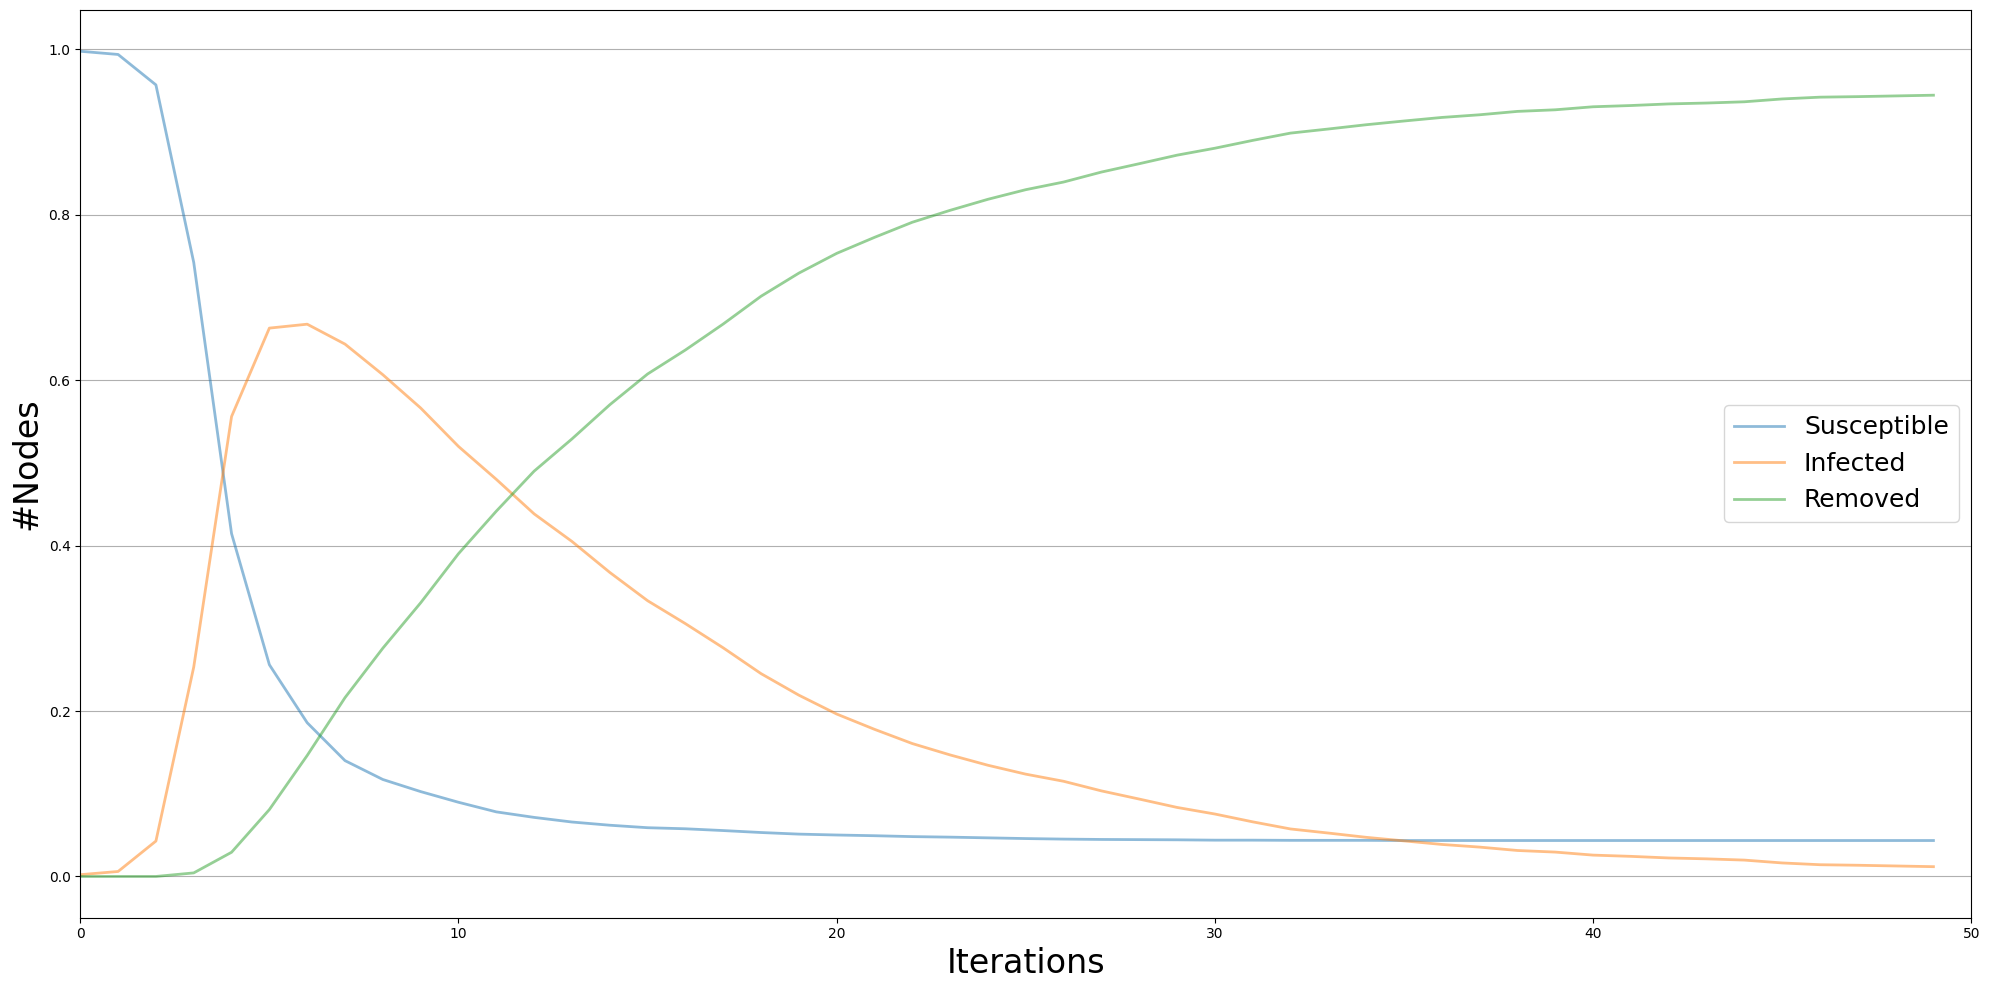

In [73]:
# Plot the progression of the number of susceptible, infected and the recovered nodes
sir_trends = sir_model.build_trends(sir_iterations)
plt.figure()
viz = DiffusionTrend(sir_model, sir_trends)
viz.plot()

In [75]:
def independent_cascade(graph, threshold, seed_set):
    """
    The model performing independent cascade simulation
    """
    # Model selection
    model = IndependentCascadesModel(graph)

    # Model configuration
    config = mc.Configuration()
    ## Set edge parameters
    for edge in G.edges():
        config.add_edge_configuration("threshold", edge, threshold)
    ## Set the initial infected nodes
    config.add_model_initial_configuration("Infected", seed_set)

    # Set the all configuations
    model.set_initial_status(config)
    return model


# Number of steps/iterations
ic_num_steps = 50
# Number of nodes in the seed set
ic_seed_set_size = 10
# Determine the seed set
ic_seed_set = np.random.choice(G.nodes(), ic_seed_set_size)
# Determine the model parameter
ic_threshold = 0.5


# Run the model
ic_model = independent_cascade(graph=G, threshold=ic_threshold, seed_set=ic_seed_set)
ic_iterations = ic_model.iteration_bunch(ic_num_steps)


# Get the number of susceptible, infected and the recovered nodes
# in the last step
print(ic_iterations[-1]["node_count"])

{0: 321, 1: 0, 2: 4327}


<Figure size 640x480 with 0 Axes>

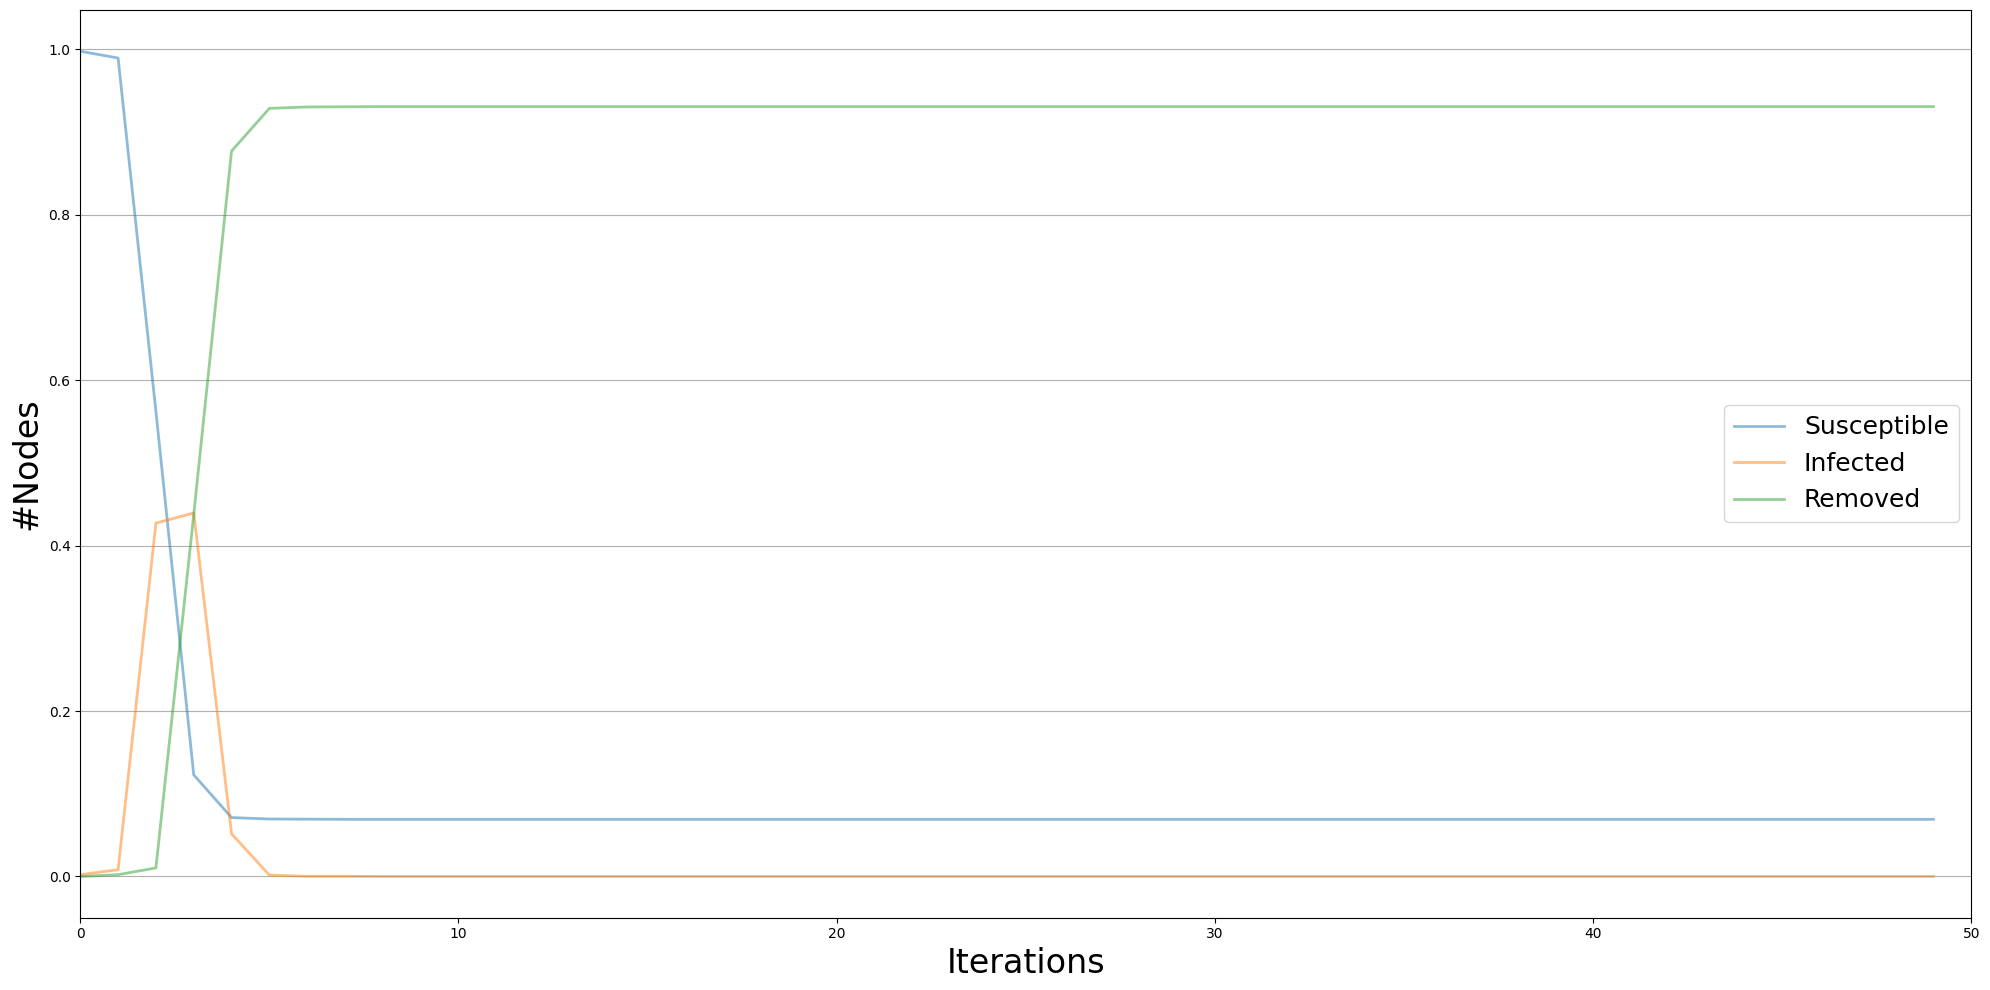

In [76]:
#_Plot the progression of the number of susceptible, infected and
# the recovered nodes
ic_trends = ic_model.build_trends(ic_iterations)
plt.figure()
viz = DiffusionTrend(ic_model, ic_trends)
viz.plot()

In [77]:
def linear_threshold(graph, threshold, seed_set):
    # Model selection
    model = ThresholdModel(graph)

    # Model configuration
    config = mc.Configuration()
    ## Set edge parameters
    for edge in G.edges():
        config.add_edge_configuration("threshold", edge, threshold)
    ## Set the initial infected nodes
    config.add_model_initial_configuration("Infected", seed_set)

    # Set the all configuations
    model.set_initial_status(config)
    return model


# Number of steps/iterations
lt_num_steps = 50
# Number of nodes in the seed set
lt_seed_set_size = 10
# Determine the seed set
lt_seed_set = np.random.choice(G.nodes(), lt_seed_set_size)
# Determine the model parameter
lt_threshold = 0.1


# Run the model
lt_model = linear_threshold(graph=G, threshold=lt_threshold, seed_set=lt_seed_set)
lt_iterations = lt_model.iteration_bunch(lt_num_steps)


# Get the number of susceptible, infected and the recovered nodes
# in the last step
print(lt_iterations[-1]["node_count"])

{0: 0, 1: 4648}


<Figure size 640x480 with 0 Axes>

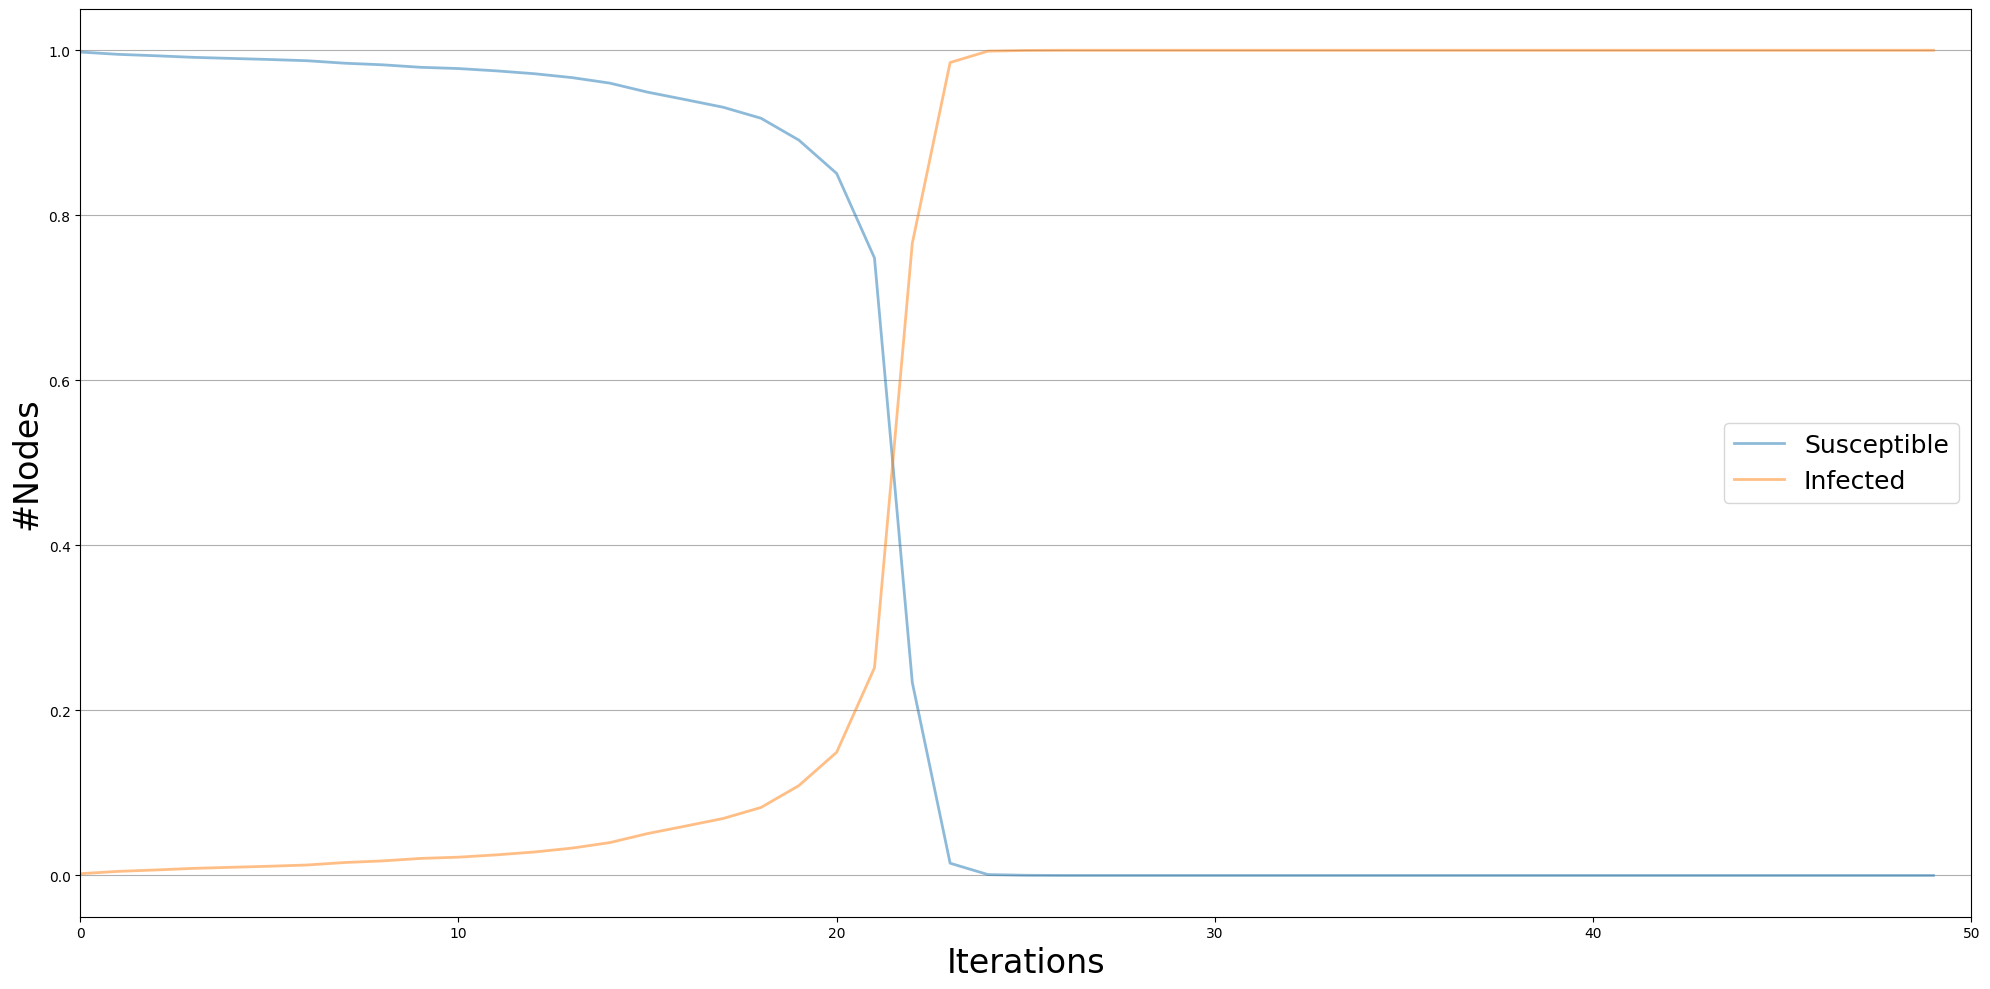

In [78]:
#_Plot the progression of the number of susceptible, infected and
# the recovered nodes
lt_trends = lt_model.build_trends(lt_iterations)
plt.figure()
viz = DiffusionTrend(lt_model, lt_trends)
viz.plot()

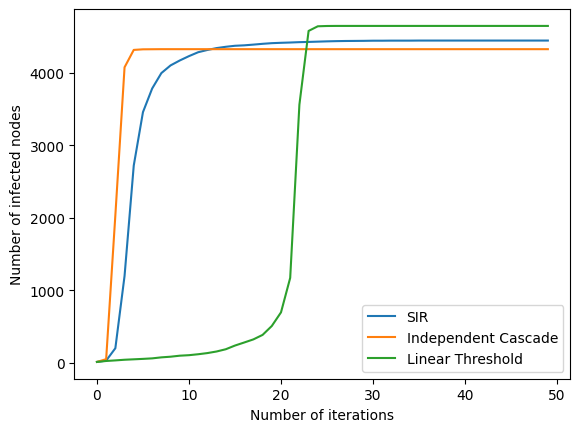

In [79]:
sir_infected_count = [iteration["node_count"][1]+iteration["node_count"][2] for iteration in sir_iterations]
ic_infected_count = [iteration["node_count"][1]+iteration["node_count"][2] for iteration in ic_iterations]
lt_infected_count = [iteration["node_count"][1] for iteration in lt_iterations]
#sis_infected_count=[iteration["node_count"][1] for iteration in sis_iterations]
#seir_infected_count = [iteration["node_count"][1]+iteration["node_count"][2]+iteration["node_count"][3] for iteration in seir_iterations]
#seirct_infected_count = [iteration["node_count"][1]+iteration["node_count"][2]+iteration["node_count"][3] for iteration in seirct_iterations]
#seis_infected_count = [iteration["node_count"][1]+iteration["node_count"][2] for iteration in seis_iterations]
#seisct_infected_count = [iteration["node_count"][1]+iteration["node_count"][2] for iteration in seisct_iterations]
#swir_infected_count = [iteration["node_count"][1]+iteration["node_count"][2]+iteration["node_count"][3] for iteration in swir_iterations]
plt.xlabel("Number of iterations")
plt.ylabel("Number of infected nodes")
line1, = plt.plot(sir_infected_count, label="SIR")
line2, = plt.plot(ic_infected_count, label="Independent Cascade")
line3, = plt.plot(lt_infected_count, label="Linear Threshold")
#line4, = plt.plot(sis_infected_count, label="SIS")
#line5, = plt.plot(seir_infected_count, label="SEIR(DT)")
#line6, = plt.plot(seirct_infected_count, label="SEIR(CT)")
#line7, = plt.plot(seis_infected_count, label="SEIS(DT)")
#line8, = plt.plot(seisct_infected_count, label="SEIR(CT)")
#line9, = plt.plot(swir_infected_count, label="SWIR")
#plt.legend(handles=[line2, line3, line9])
plt.legend(handles=[line1, line2, line3])
#plt.legend(handles=[line1, line2, line3, line4, line5,line6,line6,line7,line8])
plt.show()

In [80]:
for i in [sir_infected_count, ic_infected_count, lt_infected_count]:
  print(i[-1])

4446
4327
4648


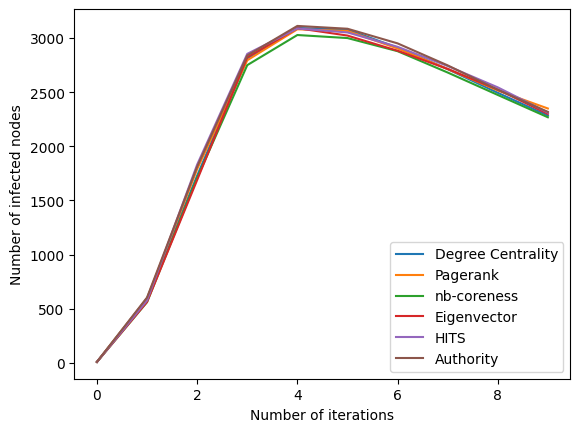

In [81]:
#SIR
import math
# Number of steps/iterations
num_steps = 10
# Number of nodes in the seed set
seed_set_size = 10

## Construct the seed sets
# Degree centrality
degree = sorted(G.degree(), key=lambda x: x[1], reverse=True)
degree_seed = [node for node, value in degree[0:seed_set_size]]

# Pagerank
pagerank = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
pagerank_seed = [node for node, value in pagerank[0:seed_set_size]]

#eigenvector_centrality
eigenvector_centrality_numpy = sorted(nx.eigenvector_centrality_numpy(G).items(), key=lambda x: x[1], reverse=True)
eigenvector_seed = [node for node, value in eigenvector_centrality_numpy[0:seed_set_size]]

#HITS
hub, authority = nx.hits(G)
hub = sorted(hub.items(), key=lambda x: x[1],reverse=True)
hub_seed = [node for node, value in hub[0:seed_set_size]]

authority = sorted(authority.items(), key=lambda x: x[1] ,reverse=True)
authority_seed = [node for node, value in authority[0:seed_set_size]]



# neighborhood coreness
node2nbcore =  {node: np.sum([G.degree(nb) for nb in G.neighbors(node)]) for node in G.nodes() }
nbkcore = sorted(node2nbcore.items(), key=lambda x: x[1], reverse=True)
nbkcore_seed = [node for node, value in nbkcore[0:seed_set_size]]



def construct_model(model_name, threshold, beta, gamma):
    if model_name == "SIR":
        model_func = SIR
        model_params = dict(graph=G,
                      beta=beta,
                      gamma=gamma)
    elif model_name == "IC":
        model_func = independent_cascade
        model_params = dict(graph=G,
                      threshold=threshold)
    elif model_name == "LT":
        model_func = linear_threshold
        model_params = dict(graph=G,
                      threshold=threshold)


    model_params["seed_set"] = degree_seed
    degree_model = model_func(**model_params)
    degree_iters = degree_model.iteration_bunch(num_steps)

    model_params["seed_set"] = pagerank_seed
    pagerank_model = model_func(**model_params)
    pagerank_iters = pagerank_model.iteration_bunch(num_steps)



    model_params["seed_set"] = nbkcore_seed
    nbkcores_model = model_func(**model_params)
    nbkcore_iters = nbkcores_model.iteration_bunch(num_steps)

    model_params["seed_set"] = eigenvector_seed
    eigenvector_model = model_func(**model_params)
    eigenvector_iters = eigenvector_model.iteration_bunch(num_steps)

    model_params["seed_set"] = authority_seed
    authority_model = model_func(**model_params)
    authority_iters = authority_model.iteration_bunch(num_steps)

    model_params["seed_set"] = hub_seed
    hub_model = model_func(**model_params)
    hub_iters = hub_model.iteration_bunch(num_steps)



    return degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters


model_name = "SIR"  # SIR, LT or IC
threshold = 0.1 # ex: 0.1 for LT, 0.5 for IC model

beta = 0.1 # for SIR
gamma = 0.1 # for SIR
degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters = construct_model(model_name, threshold, beta, gamma)

#                         [np.sum([iteration["node_count"][1]+iteration["node_count"][2]]) for iteration in sir_iterations]
#----------- Plot them
degree_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in degree_iters]
pagerank_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in pagerank_iters]
#kcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in kcore_iters]
nbkcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in nbkcore_iters]
eigenvector_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in eigenvector_iters]
hub_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in hub_iters]
authority_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in authority_iters]
#voterank_infected_count=[np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 3]]) for iteration in voterank_iters]
plt.figure()
line1, = plt.plot(range(num_steps), degree_infected_count, label="Degree Centrality")
line2, = plt.plot(range(num_steps), pagerank_infected_count, label="Pagerank")
#line3, = plt.plot(range(num_steps), kcore_infected_count, label="k-core")
line4, = plt.plot(range(num_steps), nbkcore_infected_count, label="nb-coreness")
line5, = plt.plot(range(num_steps), eigenvector_infected_count, label="Eigenvector")
line6, = plt.plot(range(num_steps), hub_infected_count, label="HITS")
line7, = plt.plot(range(num_steps), authority_infected_count, label="Authority")
#line8, = plt.plot(range(num_steps), authority_infected_count, label="Voterank")
plt.legend(handles=[line1, line2, line4, line5, line6, line7])
plt.ylabel("Number of infected nodes")
plt.xlabel("Number of iterations")
plt.show()

In [82]:
for i in [degree_infected_count, pagerank_infected_count, nbkcore_infected_count, eigenvector_infected_count, hub_infected_count, authority_infected_count]:
  print(i[-1])

2284
2349
2268
2299
2311
2318


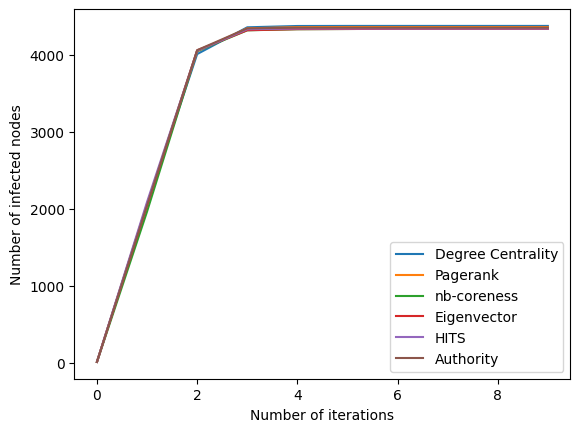

In [83]:
#IC

import math
# Number of steps/iterations
num_steps = 10
# Number of nodes in the seed set
seed_set_size = 10

## Construct the seed sets
# Degree centrality
degree = sorted(G.degree(), key=lambda x: x[1], reverse=True)
degree_seed = [node for node, value in degree[0:seed_set_size]]

# Pagerank
pagerank = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
pagerank_seed = [node for node, value in pagerank[0:seed_set_size]]

#eigenvector_centrality
eigenvector_centrality_numpy = sorted(nx.eigenvector_centrality_numpy(G).items(), key=lambda x: x[1], reverse=True)
eigenvector_seed = [node for node, value in eigenvector_centrality_numpy[0:seed_set_size]]

#HITS
hub, authority = nx.hits(G)
hub = sorted(hub.items(), key=lambda x: x[1],reverse=True)
hub_seed = [node for node, value in hub[0:seed_set_size]]

authority = sorted(authority.items(), key=lambda x: x[1] ,reverse=True)
authority_seed = [node for node, value in authority[0:seed_set_size]]



# neighborhood coreness
node2nbcore =  {node: np.sum([G.degree(nb) for nb in G.neighbors(node)]) for node in G.nodes() }
nbkcore = sorted(node2nbcore.items(), key=lambda x: x[1], reverse=True)
nbkcore_seed = [node for node, value in nbkcore[0:seed_set_size]]



def construct_model(model_name, threshold, beta, gamma):
    if model_name == "SIR":
        model_func = SIR
        model_params = dict(graph=G,
                      beta=beta,
                      gamma=gamma)
    elif model_name == "IC":
        model_func = independent_cascade
        model_params = dict(graph=G,
                      threshold=threshold)
    elif model_name == "LT":
        model_func = linear_threshold
        model_params = dict(graph=G,
                      threshold=threshold)

    model_params["seed_set"] = degree_seed
    degree_model = model_func(**model_params)
    degree_iters = degree_model.iteration_bunch(num_steps)

    model_params["seed_set"] = pagerank_seed
    pagerank_model = model_func(**model_params)
    pagerank_iters = pagerank_model.iteration_bunch(num_steps)


    model_params["seed_set"] = nbkcore_seed
    nbkcores_model = model_func(**model_params)
    nbkcore_iters = nbkcores_model.iteration_bunch(num_steps)

    model_params["seed_set"] = eigenvector_seed
    eigenvector_model = model_func(**model_params)
    eigenvector_iters = eigenvector_model.iteration_bunch(num_steps)

    model_params["seed_set"] = authority_seed
    authority_model = model_func(**model_params)
    authority_iters = authority_model.iteration_bunch(num_steps)

    model_params["seed_set"] = hub_seed
    hub_model = model_func(**model_params)
    hub_iters = hub_model.iteration_bunch(num_steps)


    return degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters


model_name = "IC"  # SIR, LT or IC
threshold = 0.5 # ex: 0.1 for LT, 0.5 for IC model
beta = 0.1 # for SIR
gamma = 0.1 # for SIR
#degree_iters, pagerank_iters, kcore_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters = construct_model(model_name, threshold, beta, gamma)
degree_iters, pagerank_iters,nbkcore_iters,eigenvector_iters, hub_iters, authority_iters = construct_model(model_name, threshold, beta, gamma)
#                         [np.sum([iteration["node_count"][1]+iteration["node_count"][2]]) for iteration in sir_iterations]
#----------- Plot them
degree_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in degree_iters]
pagerank_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in pagerank_iters]
#kcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in kcore_iters]
nbkcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in nbkcore_iters]
eigenvector_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in eigenvector_iters]
hub_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in hub_iters]
authority_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in authority_iters]
#voterank_infected_count=[np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in voterank_iters]
plt.figure()
line1, = plt.plot(range(num_steps), degree_infected_count, label="Degree Centrality")
line2, = plt.plot(range(num_steps), pagerank_infected_count, label="Pagerank")
#line3, = plt.plot(range(num_steps), kcore_infected_count, label="k-core")
line4, = plt.plot(range(num_steps), nbkcore_infected_count, label="nb-coreness")
line5, = plt.plot(range(num_steps), eigenvector_infected_count, label="Eigenvector")
line6, = plt.plot(range(num_steps), hub_infected_count, label="HITS")
line7, = plt.plot(range(num_steps), authority_infected_count, label="Authority")
#line8, = plt.plot(range(num_steps), authority_infected_count, label="Voterank")
plt.legend(handles=[line1, line2, line4, line5, line6, line7])
plt.ylabel("Number of infected nodes")
plt.xlabel("Number of iterations")
plt.show()

In [85]:
for i in [degree_infected_count, pagerank_infected_count, nbkcore_infected_count, eigenvector_infected_count, hub_infected_count, authority_infected_count]:
  print(i[-1])

4375
4361
4338
4337
4341
4352


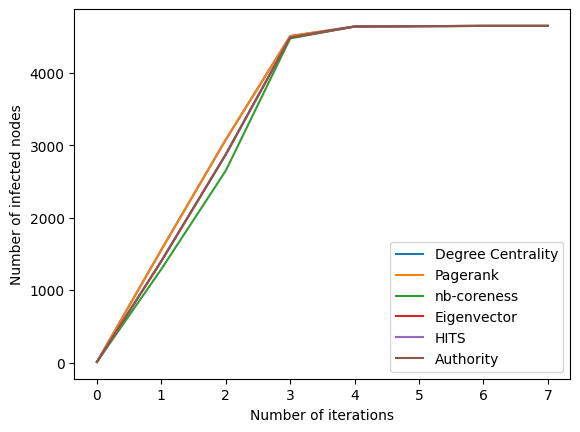

In [91]:
#LT
import math
# Number of steps/iterations
num_steps = 8
# Number of nodes in the seed set
seed_set_size = 8

## Construct the seed sets
# Degree centrality
degree = sorted(G.degree(), key=lambda x: x[1], reverse=True)
degree_seed = [node for node, value in degree[0:seed_set_size]]

# Pagerank
pagerank = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
pagerank_seed = [node for node, value in pagerank[0:seed_set_size]]

#eigenvector_centrality
eigenvector_centrality_numpy = sorted(nx.eigenvector_centrality_numpy(G).items(), key=lambda x: x[1], reverse=True)
eigenvector_seed = [node for node, value in eigenvector_centrality_numpy[0:seed_set_size]]

#HITS
hub, authority = nx.hits(G)
hub = sorted(hub.items(), key=lambda x: x[1],reverse=True)
hub_seed = [node for node, value in hub[0:seed_set_size]]

authority = sorted(authority.items(), key=lambda x: x[1] ,reverse=True)
authority_seed = [node for node, value in authority[0:seed_set_size]]



# neighborhood coreness
node2nbcore =  {node: np.sum([G.degree(nb) for nb in G.neighbors(node)]) for node in G.nodes() }
nbkcore = sorted(node2nbcore.items(), key=lambda x: x[1], reverse=True)
nbkcore_seed = [node for node, value in nbkcore[0:seed_set_size]]



def construct_model(model_name, threshold, beta, gamma):
    if model_name == "SIR":
        model_func = SIR
        model_params = dict(graph=G,
                      beta=beta,
                      gamma=gamma)
    elif model_name == "IC":
        model_func = independent_cascade
        model_params = dict(graph=G,
                      threshold=threshold)
    elif model_name == "LT":
        model_func = linear_threshold
        model_params = dict(graph=G,
                      threshold=threshold)

    model_params["seed_set"] = degree_seed
    degree_model = model_func(**model_params)
    degree_iters = degree_model.iteration_bunch(num_steps)

    model_params["seed_set"] = pagerank_seed
    pagerank_model = model_func(**model_params)
    pagerank_iters = pagerank_model.iteration_bunch(num_steps)


    model_params["seed_set"] = nbkcore_seed
    nbkcores_model = model_func(**model_params)
    nbkcore_iters = nbkcores_model.iteration_bunch(num_steps)

    model_params["seed_set"] = eigenvector_seed
    eigenvector_model = model_func(**model_params)
    eigenvector_iters = eigenvector_model.iteration_bunch(num_steps)

    model_params["seed_set"] = authority_seed
    authority_model = model_func(**model_params)
    authority_iters = authority_model.iteration_bunch(num_steps)

    model_params["seed_set"] = hub_seed
    hub_model = model_func(**model_params)
    hub_iters = hub_model.iteration_bunch(num_steps)


    return degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters


model_name = "LT"  # SIR, LT or IC
threshold = 0.1 # ex: 0.1 for LT, 0.5 for IC model
beta = 0.1 # for SIR
gamma = 0.1 # for SIR
degree_iters, pagerank_iters, nbkcore_iters,eigenvector_iters, hub_iters, authority_iters = construct_model(model_name, threshold, beta, gamma)


degree_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in degree_iters]
pagerank_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in pagerank_iters]
#kcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in kcore_iters]
nbkcore_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in nbkcore_iters]
eigenvector_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in eigenvector_iters]
hub_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in hub_iters]
authority_infected_count = [np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in authority_iters]
#voterank_infected_count=[np.sum([iteration["node_count"].get(inx, 0) for inx in [1, 2]]) for iteration in voterank_iters]
plt.figure()
line1, = plt.plot(range(num_steps), degree_infected_count, label="Degree Centrality")
line2, = plt.plot(range(num_steps), pagerank_infected_count, label="Pagerank")
#line3, = plt.plot(range(num_steps), kcore_infected_count, label="k-core")
line4, = plt.plot(range(num_steps), nbkcore_infected_count, label="nb-coreness")
line5, = plt.plot(range(num_steps), eigenvector_infected_count, label="Eigenvector")
line6, = plt.plot(range(num_steps), hub_infected_count, label="HITS")
line7, = plt.plot(range(num_steps), authority_infected_count, label="Authority")
#line8, = plt.plot(range(num_steps), authority_infected_count, label="Voterank")
plt.legend(handles=[line1, line2, line4, line5, line6, line7])
plt.ylabel("Number of infected nodes")
plt.xlabel("Number of iterations")
plt.show()

In [87]:
for i in [degree_infected_count, pagerank_infected_count, nbkcore_infected_count, eigenvector_infected_count, hub_infected_count, authority_infected_count]:
  print(i[-1])

4648
4648
4648
4648
4648
4648
